### Carregando bibliotecas

# Seguro Saúde - Analysis

### Carregando bibliotecas

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from pandas_profiling import ProfileReport
from IPython.display import display, HTML
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/datasetn/BaseTeste_DataScience.xlsx
/kaggle/input/datasetn/Seguro Sade - Modelagem.xlsx
/kaggle/input/datasetn/Seguro Sade - Teste Final.xlsx


/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
/tmp/ipykernel_32/3459091671.py:9: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling

### Funções

In [2]:
def just_check_nan(df):
    # Check NaN Pandas and Numpy
    missing_val_count_by_column = (df.isna().sum())

    columns_with_nan = missing_val_count_by_column[missing_val_count_by_column > 0]
    print('Dados com NaN:')
    print(columns_with_nan)
    print('')
    print('columns_with_nan.shape', columns_with_nan.shape)
    print('')

***
# 1) Definição do problema e objetivo do projeto

Uma administradora de planos de saúde precisa desenvolver um modelo preditivo que estima o custo médio anual gasto por cliente. 

Sua missão será de desenvolver uma modelagem preditiva baseada em algumas informações cadastrais. 

A administradora tem em mãos uma base de teste para posterior avaliação de performance da sua modelagem final.

O resultado de seu estudo será encaminhado para as áreas de negócio para validação funcional.

## 1.1) Dicionario de dados

In [3]:
dicionario = pd.read_excel('/kaggle/input/datasetn/Seguro Sade - Modelagem.xlsx', sheet_name='DICIONÁRIO')
dicionario

MATRICULA                          Matrícula do Cliente
0        IDADE                              Idade do Cliente
1   NASCIMENTO                 Data de Nascimento do Cliente
2         SEXO                               Sexo do Cliente
3          IMC                                IMC do Cliente
4       FILHOS               Quantidade de filhos do Cliente
5      FUMANTE                      Se o Cliente fuma ou não
6        SIGNO                              Signo do Cliente
7       REGIÃO                  Região de Moradia do Cliente
8     FACEBOOK  Se o Cliente possui conta do Facebook ou não
9       CLASSE                  Segmentação Atual do Cliente
10       VALOR    Custo Anual do Cliente (Variável Objetivo)

***
# 2) Coleta e preparação dos dados

## 2.1) Coleta dos dados - Modelagem 90,51% do total

In [4]:
# treinamento
df = pd.read_excel('/kaggle/input/datasetn/Seguro Sade - Modelagem.xlsx', sheet_name='MODELAGEM')
df

MATRICULA  IDADE NASCIMENTO SEXO     IMC  FILHOS  FUMANTE        SIGNO  \
0           207   56.0 1963-12-31    M  39.600     0.0      0.0  Capricórnio   
1           852   32.0 1987-10-16    F  37.145     3.0      0.0        Libra   
2           463   47.0 1973-01-23    F  24.100     1.0      0.0      Aquário   
3           628   41.0 1979-01-08    M  30.780     3.0      1.0  Capricórnio   
4          1100   23.0 1996-10-07    M  37.100     3.0      0.0        Libra   
...         ...    ...        ...  ...     ...     ...      ...          ...   
1206         71   61.0 1958-05-26    F  36.385     1.0      1.0       Gêmeos   
1207       1198   20.0 2000-02-11    F  31.920     0.0      0.0      Aquário   
1208        983   27.0 1992-06-04    F  36.080     0.0      1.0       Gêmeos   
1209        299   52.0 1967-05-15    M  32.775     3.0      0.0        Touro   
1210        223   55.0 1964-08-23    F  33.535     2.0      NaN       Virgem   

      REGIÃO  FACEBOOK  CLASSE         VALOR  
0        3.0       0.0     7.0   3242.022018  
1        2.0       1.0     2.0   1937.108119  
2        3.0       1.0     7.0   8023.418951  
3        2.0       1.0     6.0  12109.298838  
4        3.0       1.0     4.0   1100.182263  
...      ...       ...     ...           ...  
1206     2.0       0.0    10.0  14837.175275  
1207     4.0       1.0     5.0    691.611254  
1208     1.0       1.0    10.0  11355.932171  
1209     4.0       0.0     1.0   3452.326988  
1210     4.0       0.0     NaN   3752.198364  

[1211 rows x 12 columns]

### Checar dados faltantes

In [5]:
just_check_nan(df)

Dados com NaN:
IDADE         5
NASCIMENTO    8
SEXO          7
IMC           5
FILHOS        8
FUMANTE       8
SIGNO         6
REGIÃO        6
FACEBOOK      3
CLASSE        5
dtype: int64

columns_with_nan.shape (10,)



### Apagando dados faltantes

No caso deste problema, como a quantidade de dados faltantes é pouco com relação ao total, optei por deletar os faltantes.

O ideal é averiguar o motivo dos dados faltantes, e se mesmo assim persistir a falta, podemos:

   - Fill nos dados faltantes com:
       - Valores fixos
       - Valores medios
       - Previsão


In [6]:
df_dropped = df.dropna().reset_index(drop=True)

# df_dropped = df

### Checando novamente dados faltantes

In [7]:
just_check_nan(df_dropped)

Dados com NaN:
Series([], dtype: int64)

columns_with_nan.shape (0,)



In [8]:
df_dropped

MATRICULA  IDADE NASCIMENTO SEXO     IMC  FILHOS  FUMANTE        SIGNO  \
0           207   56.0 1963-12-31    M  39.600     0.0      0.0  Capricórnio   
1           852   32.0 1987-10-16    F  37.145     3.0      0.0        Libra   
2           463   47.0 1973-01-23    F  24.100     1.0      0.0      Aquário   
3           628   41.0 1979-01-08    M  30.780     3.0      1.0  Capricórnio   
4          1100   23.0 1996-10-07    M  37.100     3.0      0.0        Libra   
...         ...    ...        ...  ...     ...     ...      ...          ...   
1155        369   50.0 1969-08-24    M  32.300     2.0      0.0       Virgem   
1156         71   61.0 1958-05-26    F  36.385     1.0      1.0       Gêmeos   
1157       1198   20.0 2000-02-11    F  31.920     0.0      0.0      Aquário   
1158        983   27.0 1992-06-04    F  36.080     0.0      1.0       Gêmeos   
1159        299   52.0 1967-05-15    M  32.775     3.0      0.0        Touro   

      REGIÃO  FACEBOOK  CLASSE         VALOR  
0        3.0       0.0     7.0   3242.022018  
1        2.0       1.0     2.0   1937.108119  
2        3.0       1.0     7.0   8023.418951  
3        2.0       1.0     6.0  12109.298838  
4        3.0       1.0     4.0   1100.182263  
...      ...       ...     ...           ...  
1155     3.0       1.0     7.0   2945.075535  
1156     2.0       0.0    10.0  14837.175275  
1157     4.0       1.0     5.0    691.611254  
1158     1.0       1.0    10.0  11355.932171  
1159     4.0       0.0     1.0   3452.326988  

[1160 rows x 12 columns]

### Checagem e mudança de Tipagem

In [9]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1160 entries, 0 to 1159
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   MATRICULA   1160 non-null   int64         
 1   IDADE       1160 non-null   float64       
 2   NASCIMENTO  1160 non-null   datetime64[ns]
 3   SEXO        1160 non-null   object        
 4   IMC         1160 non-null   float64       
 5   FILHOS      1160 non-null   float64       
 6   FUMANTE     1160 non-null   float64       
 7   SIGNO       1160 non-null   object        
 8   REGIÃO      1160 non-null   float64       
 9   FACEBOOK    1160 non-null   float64       
 10  CLASSE      1160 non-null   float64       
 11  VALOR       1160 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(2)
memory usage: 108.9+ KB


***
# Análise exploratória dos dados

In [10]:
dados_analysis = ProfileReport(df_dropped, title="Profiling Report", progress_bar=True, infer_dtypes=False)
profile_td_html = dados_analysis.to_html()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
display(HTML(profile_td_html))

***
# Analise Individual

IDADE

In [12]:
df_dropped['IDADE'].describe()

count    1160.000000
mean       39.318966
std        13.943928
min        18.000000
25%        27.000000
50%        40.000000
75%        51.000000
max        64.000000
Name: IDADE, dtype: float64

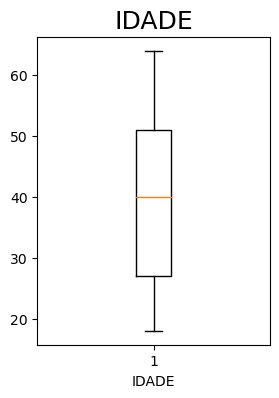

In [13]:
plt.figure(figsize =(3, 4))

#Plotando o boxplot das espécies em relação ao tamanho das sépalas
bplots = plt.boxplot(df_dropped['IDADE'], vert = 1)

# Adicionando Título ao gráfico
plt.title("IDADE", loc="center", fontsize=18)
plt.xlabel("IDADE")
# plt.ylabel("Idade")

plt.show()

IMC

In [14]:
df_dropped['IMC'].describe()

count    1160.000000
mean       30.730543
std         6.116144
min        15.960000
25%        26.315000
50%        30.500000
75%        34.800000
max        53.130000
Name: IMC, dtype: float64

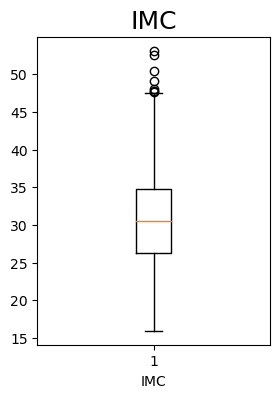

In [15]:
plt.figure(figsize =(3, 4))

#Plotando o boxplot das espécies em relação ao tamanho das sépalas
bplots = plt.boxplot(df_dropped['IMC'], vert = 1)

# Adicionando Título ao gráfico
plt.title("IMC", loc="center", fontsize=18)
plt.xlabel("IMC")
# plt.ylabel("idade")

plt.show()

FILHOS

In [16]:
df_dropped['FILHOS'].describe()

count    1160.000000
mean        1.100000
std         1.205538
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: FILHOS, dtype: float64

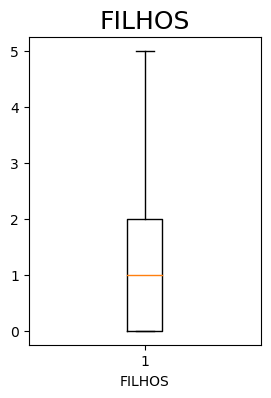

In [17]:
plt.figure(figsize =(3, 4))

#Plotando o boxplot das espécies em relação ao tamanho das sépalas
bplots = plt.boxplot(df_dropped['FILHOS'], vert = 1)

# Adicionando Título ao gráfico
plt.title("FILHOS", loc="center", fontsize=18)
plt.xlabel("FILHOS")
# plt.ylabel("idade")

plt.show()

In [18]:
df_dropped['CLASSE'].describe()

count    1160.000000
mean        5.403448
std         2.854116
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: CLASSE, dtype: float64

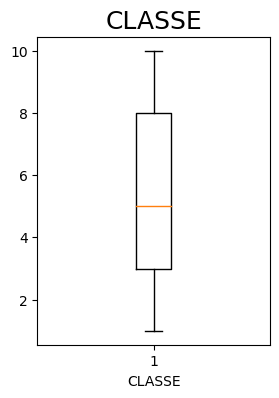

In [19]:
plt.figure(figsize =(3, 4))

#Plotando o boxplot das espécies em relação ao tamanho das sépalas
bplots = plt.boxplot(df_dropped['CLASSE'], vert = 1)

# Adicionando Título ao gráfico
plt.title("CLASSE", loc="center", fontsize=18)
plt.xlabel("CLASSE")
# plt.ylabel("idade")

plt.show()

In [20]:
df_dropped['VALOR'].describe()

count     1160.000000
mean      4030.078692
std       3726.060413
min          0.000000
25%       1443.328265
50%       2801.024564
75%       4858.986998
max      19501.659942
Name: VALOR, dtype: float64

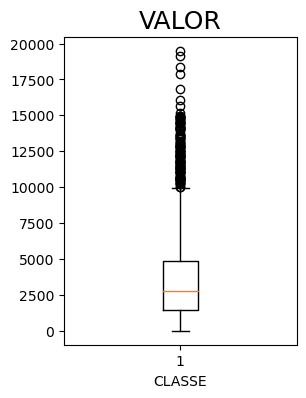

In [21]:
plt.figure(figsize =(3, 4))

#Plotando o boxplot das espécies em relação ao tamanho das sépalas
bplots = plt.boxplot(df_dropped['VALOR'], vert = 1)

# Adicionando Título ao gráfico
plt.title("VALOR", loc="center", fontsize=18)
plt.xlabel("CLASSE")
# plt.ylabel("idade")

plt.show()

In [22]:
df_dropped['SIGNO'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1160 entries, 0 to 1159
Series name: SIGNO
Non-Null Count  Dtype 
--------------  ----- 
1160 non-null   object
dtypes: object(1)
memory usage: 9.2+ KB


In [23]:
import seaborn as sns

def plot_feature_freq_mes(df, feature):
    labels, counts = np.unique(df[feature].dropna(), return_counts=True)
    total = counts[0] + counts[1] + counts[2] + counts[3] + counts[4] + counts[5] + counts[6] +\
            counts[7] + counts[8] + counts[9] + counts[10] + counts[11]
    plt.figure(figsize=(10, 7))
    ax = sns.barplot(x=labels, y=(counts/total)*100, data = df)
    ax2 = sns.barplot(x=labels, y=counts, data = df)

    for p in ax.patches:
        ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x() + 0.3, p.get_height()+0.6), rotation = 0)

#     ax.set(xlabel='Trocou', ylabel='Porcentagem')
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    plt.show()

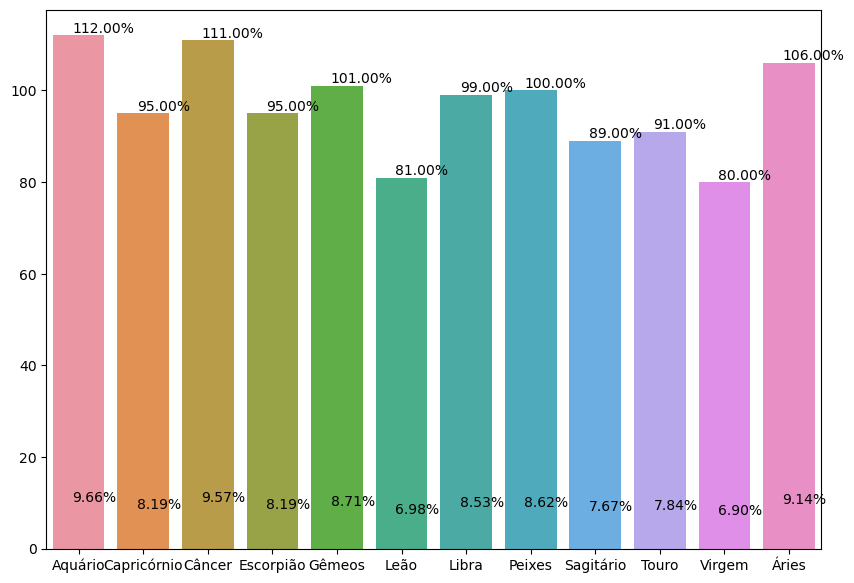

In [24]:
plot_feature_freq_mes(df_dropped, 'SIGNO')